# Face recognition from an image folder

 In this notebook , you will find an example of face recognition method with deep learning. A test image will be compared with bunch of imagse from a folder and algorithm will return the name of person. In the 'ladies' folder, you will see three Hollywood actress' images and the test image will be compared with these images. In my first notebook (face_comparation_deep_learning(face_recognition)), I gave details about face_recognition library. If you have questions like 'how model detect faces' or 'how model compare faces and give result', please visit my notebook. I think you will find answers there.
 
 For the original codes or details, you should visit reference links.
 
 

In [27]:
#first import our libraries
import cv2
import numpy as np
import face_recognition
import os
print('packages are imported...')

packages are imported...


First we should load our images from dataset and hold their names with the same order. You should be careful about dataset. In here , the algorithm takes file name as 'name'. Because of that reason, the images in dataset folder should have correct names.

For my case, dataset is like this : 
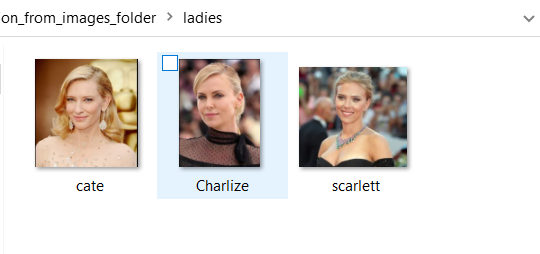



In [28]:
path = 'ladies'
#be careful about the path
#the path value can be different for you, be sure about path

myList = os.listdir(path)
print(myList)
#see what we have in our folder and check if it is correct folder

['cate.JPG', 'Charlize.JPG', 'scarlett.JPG']


In [29]:
#create 2 list for images and their names
all_images = []
classNames = []

with a for loop, we will take every image in folder. Save image in 'all_images' and save its name in 'classNames'. For class name, we will take file name and get rid of from file extention. Let's see what we will have:

In [30]:
for clas in myList:
    #load image with opencv
    currentImg = cv2.imread(f'{path}/{clas}')
    #save image in 'all_images'
    all_images.append(currentImg)
    #split file name and take the class name
    classNames.append(os.path.splitext(clas)[0])
print(classNames)
#show our classes

['cate', 'Charlize', 'scarlett']


Now we have classes and images. How we will compare images?? 

By the help of 'face_recognition', algorithm will compute images encodings and then compare each of them with the test image's encodings. 

'face_recognition' uses a deep learning technique and take 128 dim encoding for each image. After finding encodings, It uses Euclidean distance method for comparing images and returns a boolean result according to the threshold value. In my first notebook , I tried to explain this concept. For details you can check my other notebook or check the reference links. 

Let's create an empty list to save images' encodings and prepare them for comparation

In [31]:
encoding_List = []
#take each image and find encodings
for img in all_images:
        #change channels for face_recognition library
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    encode_an_image = face_recognition.face_encodings(img)[0]
    encoding_List.append(encode_an_image)
print(len(encoding_List))
print("Shape of encoding_List: ",np.shape(encoding_List))


3
Shape of encoding_List:  (3, 128)


We have 128 dim encodings for each of our images in folder. Now we will take a test image, take its encodings and compare with others.

In [32]:
img=cv2.imread(r'scarlett3.JPG')
imgRGB=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
encode_Test= face_recognition.face_encodings(imgRGB)[0]
#calculate the distances
#results will give 3 different boolean values
#if the distance is smaller than 0.6, true..
results = face_recognition.compare_faces(encoding_List, encode_Test)
face_distances = face_recognition.face_distance(encoding_List, encode_Test)
#take the smallest distance index
matchIndex = np.argmin(face_distances)

print(results, face_distances)
print(matchIndex)

[False, False, True] [0.73481996 0.67507933 0.30813172]
2


!!!!WARNING!!!! If you don't have a face on the image or model can't find face, you may take an error !!!!

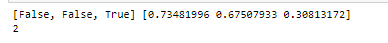

We have 3 boolean results from compare_faces method and 3 values from face_distance method. If the distance of faces is bigger than 0.6 , compare_faces returns false. As you can see, we have a 'true' with the same index of '0.31'. Let's see what we find

We need an if case for correct prediction. We should check 'compare_faces' and take the index of 'True'. If your test image is not similar none of the images in your dataset,  'face_distance' will return 3 values again but taking the smallest one can't be a solution. On the otherhand, 'compare_faces' will 3 Falses and we can understand that there is no similarity with test image.

In [33]:
if results[matchIndex]:
    name = classNames[matchIndex].upper()
else:
    name='UNKNOWN'

print('RECOGNITION RESULT : '+name)

RECOGNITION RESULT : SCARLETT


In [34]:
cv2.putText(img, f'{name} {round(face_distances[matchIndex], 2)}', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
cv2.imshow('TEST IMAGE', img)
cv2.waitKey(0)

-1

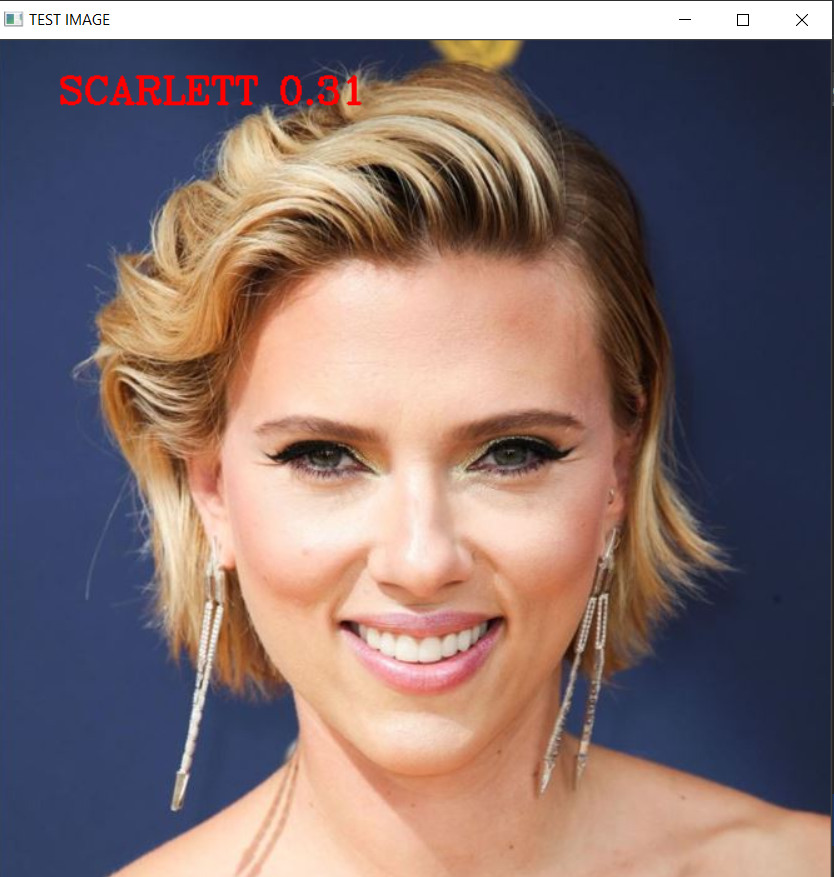



Let's try another image and see results




In [35]:
img=cv2.imread(r'keanu.JPG')
imgRGB=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

encode_Test= face_recognition.face_encodings(imgRGB)[0]
#calculate the distances
#results will give 3 different boolean values
#if the distance is smaller than 0.6, true..
results = face_recognition.compare_faces(encoding_List, encode_Test)
face_distances = face_recognition.face_distance(encoding_List, encode_Test)
#take the smallest distance index
matchIndex = np.argmin(face_distances)

print(results, face_distances)
print(matchIndex)

if results[matchIndex]:
    name = classNames[matchIndex].upper()
else:
    name='UNKNOWN'

print('RECOGNITION RESULT : '+name)

cv2.putText(img, f'{name} {round(face_distances[matchIndex], 2)}', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
cv2.imshow('TEST IMAGE', img)
cv2.waitKey(0)

[False, False, False] [0.81727895 0.87869037 0.7974843 ]
2
RECOGNITION RESULT : UNKNOWN


-1

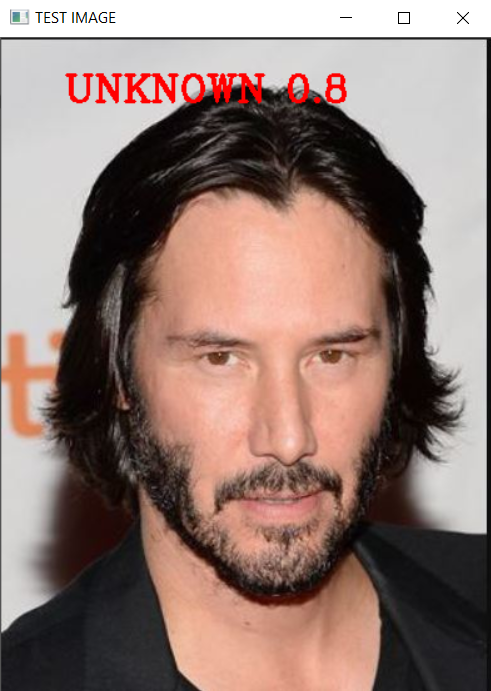

I tried to explain a face recognition method with examples. I hope it helps to understand concept. If you want to use this code, be sure that you change your dataset path and test image.

For a real case, this method is not useful. First of all , we should have more images for a person in our dataset. When we have more images, preparing encodings for every time takes much more time. For that purpose, we should save encodings in a file. When we have lots of images in dataset,The results of comparation may give lots of 'true' indexes and we should have a method for using these 'true' values. In my next notebook, I will try to explain that case.  

REFERENCE LINKS : 
* https://www.youtube.com/watch?v=sz25xxF_AVE&ab_channel=Murtaza%27sWorkshop-RoboticsandAI
* https://github.com/ageitgey/face_recognition